In [38]:
from pandas import DataFrame, read_csv
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('overdoses.csv',index_col='State')
pi=pd.read_csv('prescriber-info.csv',index_col='State')

In [4]:
# quick look at the data 
df.head()

,Population,Deaths,Abbrev,Percent
State,,,,
Alabama,"4,833,722",723,AL,0.000150
Alaska,"735,132",124,AK,0.000169
Arizona,"6,626,624","1,211",AZ,0.000183
Arkansas,"2,959,373",356,AR,0.000120
California,"38,332,521","4,521",CA,0.000118


In [5]:
# summary statistics
pi.head()

,NPI,Gender,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
State,,,,,,,,,,,,,,,,,,,,,
TX,1710982582,M,DDS,Dentist,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
AL,1245278100,F,MD,General Surgery,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
NY,1427182161,F,M.D.,General Practice,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
AZ,1669567541,M,MD,Internal Medicine,0,43,0,0,0,21,...,0,0,0,0,0,0,0,0,0,1
NV,1679650949,M,M.D.,Hematology/Oncology,0,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [6]:
deaths = df['Deaths']

In [7]:
fen=pi['FENTANYL']

In [8]:
print(df.columns)

Index([u'Population', u'Deaths', u'Abbrev', u'Percent'], dtype='object')


In [9]:
df

,Population,Deaths,Abbrev,Percent
State,,,,
Alabama,"4,833,722",723,AL,0.000150
Alaska,"735,132",124,AK,0.000169
Arizona,"6,626,624","1,211",AZ,0.000183
Arkansas,"2,959,373",356,AR,0.000120
California,"38,332,521","4,521",CA,0.000118
Colorado,"5,268,367",899,CO,0.000171
Connecticut,"3,596,080",623,CT,0.000173
Delaware,"925,749",189,DE,0.000204
Florida,"19,552,860","2,634",FL,0.000135


In [21]:
spec_count=pi['Specialty'].value_counts()
fen_count=pi['FENTANYL'].value_counts()

In [11]:
#top 10
spec_count[:10]

Internal Medicine        3194
Family Practice          2975
Dentist                  2800
Nurse Practitioner       2512
Physician Assistant      1839
Emergency Medicine       1087
Psychiatry                691
Cardiology                688
Obstetrics/Gynecology     615
Orthopedic Surgery        575
Name: Specialty, dtype: int64

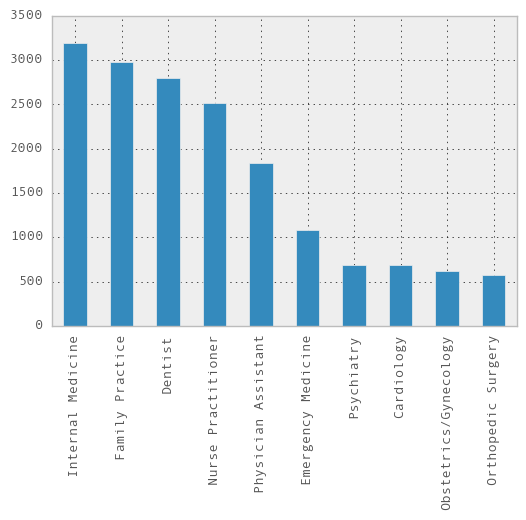

In [12]:
#plot it
spec_count[:10].plot(kind='bar')

In [15]:
fen_sort = pi.sort_values(['FENTANYL'], ascending=False)

In [16]:
fen_sort[:10]

,NPI,Gender,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
State,,,,,,,,,,,,,,,,,,,,,
FL,1831150630,M,M.D.,Interventional Pain Management,0,55,0,0,0,0,...,0,0,29,0,0,0,0,0,76,1
GA,1043275670,F,M.D.,Internal Medicine,113,0,54,179,79,0,...,46,50,597,0,358,84,46,18,14,1
LA,1225069065,M,M.D.,Interventional Pain Management,0,20,0,0,0,0,...,0,0,101,0,0,0,0,0,310,1
NY,1831339902,M,M.D.,Neurology,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,42,1
ND,1316259294,F,NP,Nurse Practitioner,28,16,0,59,31,105,...,0,14,20,0,173,0,63,0,62,1
FL,1043205305,M,MD,Anesthesiology,0,0,0,0,0,0,...,0,0,22,0,0,0,0,0,100,1
LA,1750364121,M,MD,Physical Medicine and Rehabilitation,0,0,0,0,0,0,...,0,0,240,0,0,0,0,0,418,1
TN,1801145230,F,APRN,Nurse Practitioner,0,0,0,0,0,0,...,0,0,38,0,0,0,0,0,67,1
OK,1518170927,F,M.D.,Anesthesiology,0,0,0,0,0,0,...,0,0,31,0,0,0,0,0,33,1


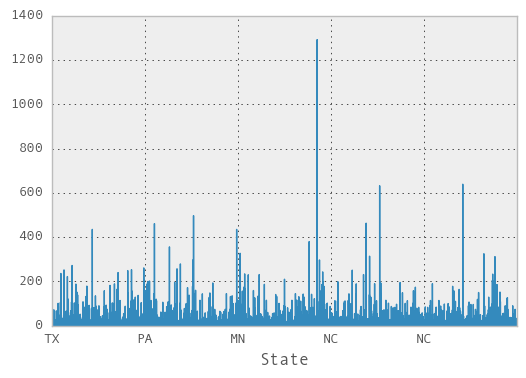

In [25]:
pi['FENTANYL'].plot()

In [30]:
pi.dtypes

NPI                                int64
Gender                            object
Credentials                       object
Specialty                         object
ABILIFY                            int64
ACETAMINOPHEN.CODEINE              int64
ACYCLOVIR                          int64
ADVAIR.DISKUS                      int64
AGGRENOX                           int64
ALENDRONATE.SODIUM                 int64
ALLOPURINOL                        int64
ALPRAZOLAM                         int64
AMIODARONE.HCL                     int64
AMITRIPTYLINE.HCL                  int64
AMLODIPINE.BESYLATE                int64
AMLODIPINE.BESYLATE.BENAZEPRIL     int64
AMOXICILLIN                        int64
AMOX.TR.POTASSIUM.CLAVULANATE      int64
AMPHETAMINE.SALT.COMBO             int64
ATENOLOL                           int64
ATORVASTATIN.CALCIUM               int64
AVODART                            int64
AZITHROMYCIN                       int64
BACLOFEN                           int64
BD.ULTRA.FINE.PE

In [31]:
import statsmodels.formula.api as sm